In [1]:
print('Hello, World!')

Hello, World!


In [1]:
#verificando que se importen las librerias
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#cargamos los datos
import pandas as pd
# Lee el archivo de texto con datos separados por comas y carga los datos en un DataFrame
data = pd.read_csv('daots.txt', delimiter=',')
# Por ejemplo, para imprimir las primeras filas del DataFrame:
print(data.head())

  Fecha Hora (YYYY-MM-DD HH:MM)  \
0              2010-05-16 11:20   
1              2010-05-16 11:30   
2              2010-05-16 11:40   
3              2010-05-16 11:50   
4              2010-05-16 12:00   

   RadiaciÃ³n Solar Global en Seguimiento [mean,W/m2]  \
0                                           -20893.0    
1                                           -20892.0    
2                                            -4782.0    
3                                              739.0    
4                                              762.0    

   RadiaciÃ³n Solar Difusa en Seguimiento [mean,W/m2]  \
0                                           -22955.0    
1                                           -21681.0    
2                                              704.0    
3                                              720.0    
4                                              744.0    

   RadiaciÃ³n Solar Global Horizontal [mean,W/m2]  Temperatura [mean,C]  \
0                           

In [3]:
#ahora se debe elegir la columna de fechas y la variable que usaremos en la red neuronal

#primero debemos usar otro formato de fecha, pues tenemos una columna con el a~no-mes-dia y otro con la hora-minuto
#los datos se toman cada 10 minutos 

#la variable que usaremos por ahora para probar sera: "RadiaciÃ³n Solar Global Horizontal [mean,W/m2]"
#que corresponde a la columna 

#columna de fechas, hacemos un nuevo vector con la primera columna de los datos
#empezaremos desde el segundo dia medido para empezar desde las 00:00hrs
fecha = data.iloc[60:, 0]
print(fecha)

#datos de irradiancia horizontal
irra_hor = data.iloc[60:, 3]
print(irra_hor)

60        2010-05-17 00:00
61        2010-05-17 00:10
62        2010-05-17 00:20
63        2010-05-17 00:30
64        2010-05-17 00:40
                ...       
369131    2017-10-17 06:40
369132    2017-10-17 06:50
369133    2017-10-17 07:00
369134    2017-10-17 07:10
369135    2017-10-17 07:20
Name: Fecha Hora (YYYY-MM-DD HH:MM), Length: 369076, dtype: object
60         -1.0
61         -1.0
62         -1.0
63         -1.0
64         -1.0
          ...  
369131     43.0
369132     74.0
369133    104.0
369134    140.0
369135    176.0
Name: RadiaciÃ³n Solar Global Horizontal [mean,W/m2], Length: 369076, dtype: float64


In [4]:
#pasamos el vector de fechas a otro formato, utilizando la funcion datetime
fecha_datetime = pd.to_datetime(fecha, format='%Y-%m-%d %H:%M')
print(fecha_datetime)

60       2010-05-17 00:00:00
61       2010-05-17 00:10:00
62       2010-05-17 00:20:00
63       2010-05-17 00:30:00
64       2010-05-17 00:40:00
                 ...        
369131   2017-10-17 06:40:00
369132   2017-10-17 06:50:00
369133   2017-10-17 07:00:00
369134   2017-10-17 07:10:00
369135   2017-10-17 07:20:00
Name: Fecha Hora (YYYY-MM-DD HH:MM), Length: 369076, dtype: datetime64[ns]


In [6]:
# o bien se puede usar la funcion datenum 
fecha_serial = pd.to_datetime(fecha, format='%Y-%m-%d %H:%M').to_numpy()
#print(fecha_serial)

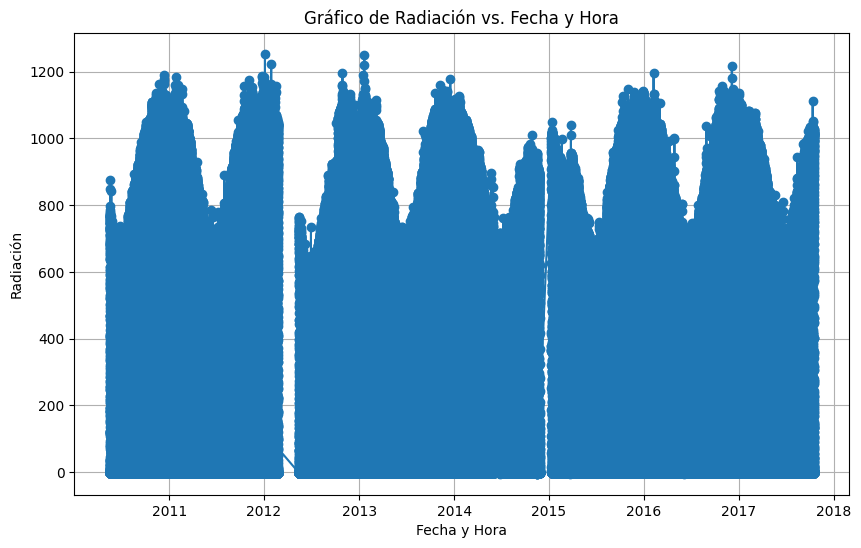

In [5]:
#graficamos 
plt.figure(figsize=(10, 6))
plt.plot(fecha_datetime, irra_hor, marker='o', linestyle='-')
plt.title('Gráfico de Radiación vs. Fecha y Hora')
plt.xlabel('Fecha y Hora')
plt.ylabel('Radiación')
plt.grid(True)

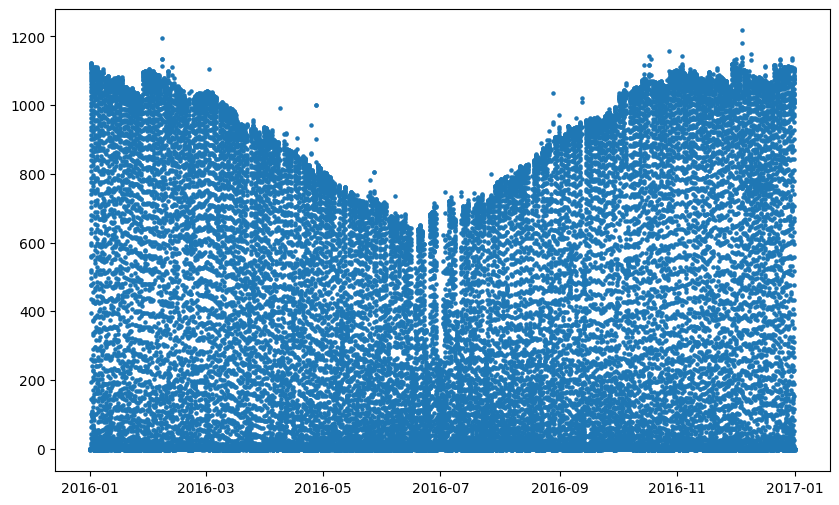

In [13]:
# en la figura se observa que durante el 2012 hay una seccion sin datos al igual que justo antes del 2015
#por otro lado, la figura tiene demasiados datos por lo que es dificil su visualizacion por lo que graficaremos solo el periodo de 2016  
#graficamos 



#fecha2016 = data.iloc[:, 0]
#fecha_datetime2016 = pd.to_datetime(fecha2016, format='%Y-%m-%d %H:%M')
#print(fecha_datetime2016)
#datos de irradiancia horizontal
#irra_hor2016 = data.iloc[:, 3]
#print(irra_hor2016)

#buscamos las posiciones que tengan el 2016
ubicaciones_2016 = fecha_datetime.dt.year == 2016
fechas_2016 = fecha[ubicaciones_2016]
irra_2016 = irra_hor[ubicaciones_2016]

fecha_datetime_2016 = pd.to_datetime(fechas_2016, format='%Y-%m-%d %H:%M')

#graficamos
plt.figure(figsize=(10, 6))
plt.scatter(fecha_datetime_2016, irra_2016, label='Radiación 2016', marker='o', s=5)
#plt.scatter
#plt.figure(figsize=(10, 6))
#plt.plot(fechas_2016, irra_2016, linestyle='')
#plt.title('Gráfico de Radiación vs. Fecha y Hora, year ')
#plt.xlabel('Fecha y Hora')
#plt.ylabel('Radiación')
#plt.grid(True)

In [ ]:
#son demasiadas observaciones, pues tenemos cada 10minutos. Buscaremos en la pagina de datos si es posible descargar cada 1 hora
# de no se posible habra que hacer un ciclo para sumar cada 10 minutos el total de irradiancia y luego graficar cada 1 hora 

#a pesar de lo no bonito del grafico, se puede observar la tendencia estacional de la irradicianca en la zona. Es decir en el periodo 
# [enero, febrero] [noviembre, diciembre] la irradiancia alcanza los mayores valores

Text(0.5, 1.0, 'Gráfico Radiacion Solar Global Horizontal: Puerto Angamos, Antofagasta')

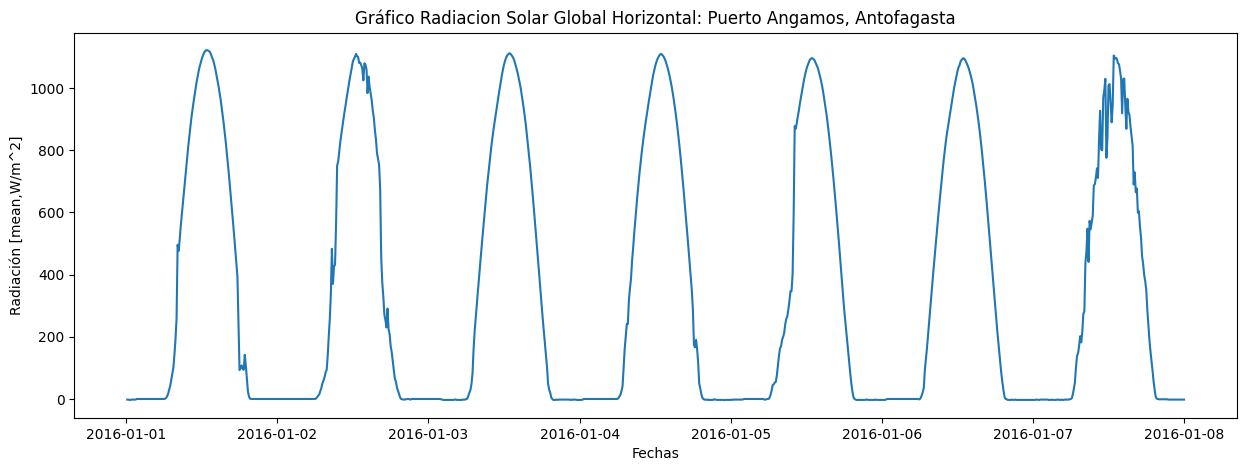

In [30]:
#graficando una semana 

#si mide cada 10m, entonces en 1h tendremos= 60/10=6 mediciones, en 1 dia 24*6= 144 medicione, en 1 semana 144*7= 1008 mediciones 

#graficando la primera semana del 2016 
semana1_fecha = fecha_datetime_2016.iloc[1:1009,]
semana1_irra = irra_2016.iloc[1:1009,]

#graficamos
plt.figure(figsize=(15, 5))
plt.plot(semana1_fecha, semana1_irra, label='Radiación 2016')
plt.xlabel('Fechas')
plt.ylabel('Radiación [mean,W/m^2]')
plt.title('Gráfico Radiacion Solar Global Horizontal: Puerto Angamos, Antofagasta')
#http://walker.dgf.uchile.cl/Mediciones/

coast [WARNING]: Option -D: Unknown modifier 1 [Defaults to -Dl]


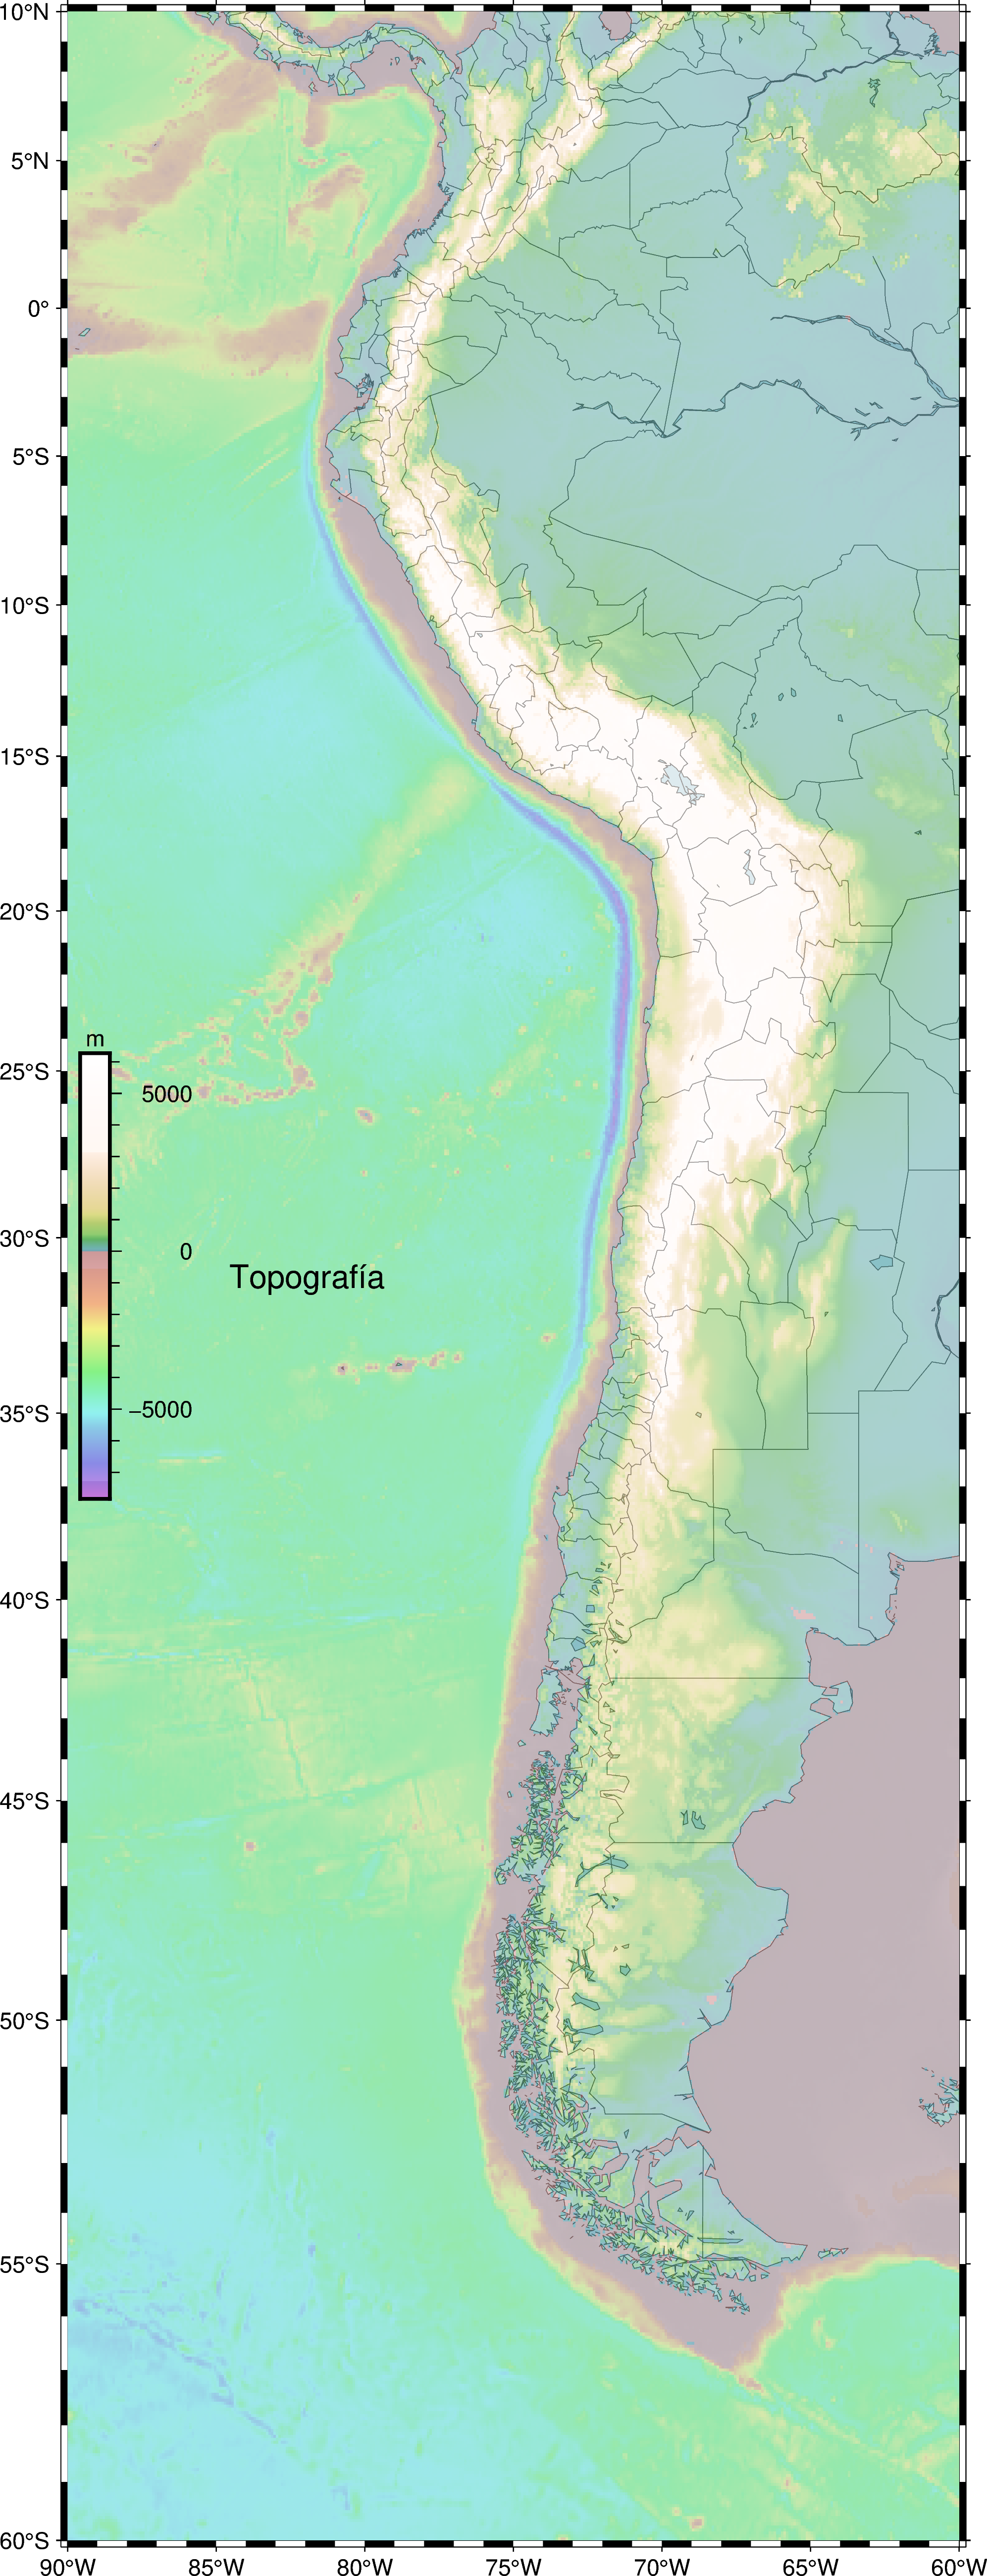

In [1]:
import pygmt
fig = pygmt.Figure()
#fig.basemap(region="g", projection="P6i", frame=True)
fig.basemap(region=[-90, -60, -60, 10], projection="M6i", frame=True)
#fig.coast(shorelines=True, resolution="10m", water="skyblue")

fig.coast(shorelines=True, resolution="10m", water="lightblue", borders=[1, 2])
#fig.grdcontour(grid="@earth_relief_03m", interval=1000, annotation="500+f8p,Helvetica-Bold,black")
fig.grdimage(grid="@earth_relief_05m", cmap="topo", transparency=40)
# Agregar una etiqueta al mapa
#fig.text(x=0, y=0, text="Ecuador", justify="CB", font="12p,Helvetica-Bold")
fig.colorbar(position="jML+w3i/0.2i+v", frame=["xaf+LTopografía", "y+lm"])


#fig.savefig("mapa.png")
fig.show()